In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report



In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 23s 0us/step


D:\datascience_task2\venv\Lib\site-packages\keras\src\datasets\cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']


In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0


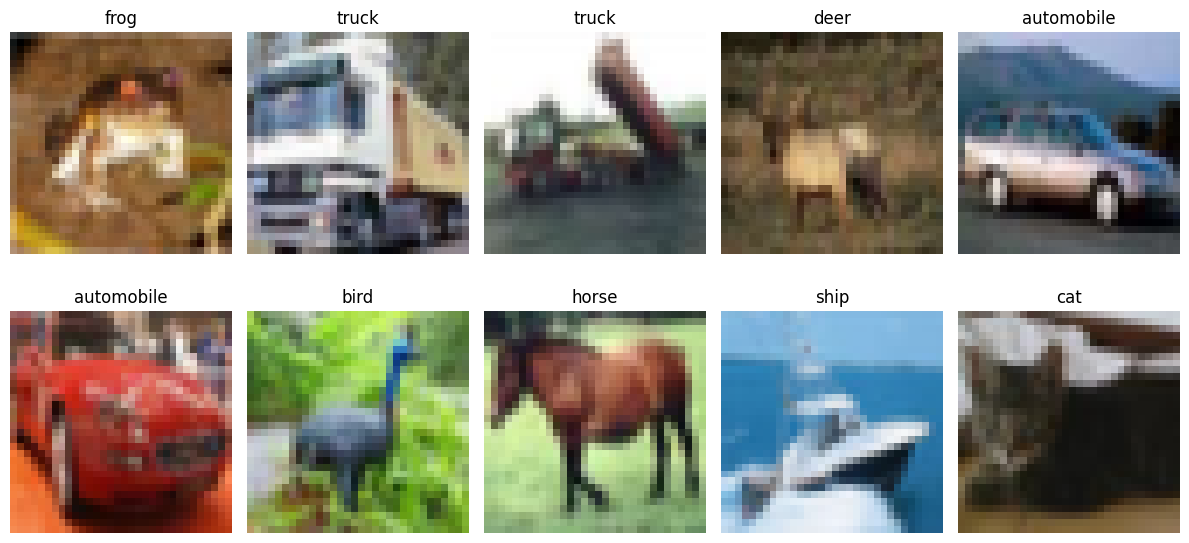

In [6]:
plt.figure(figsize=(12,6))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")

plt.tight_layout()
plt.show()


In [7]:
y_train = y_train.flatten()
y_test = y_test.flatten()


In [8]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(10, activation='softmax')
])


D:\datascience_task2\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape               ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                     │ (None, 30, 30, 32)         │             896 │
├─────────────────────────────────────┼────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)        │ (None, 15, 15, 32)         │               0 │
├─────────────────────────────────────┼────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                   │ (None, 13, 13, 64)         │          18,496 │
├─────────────────────────────────────┼────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)      │ (None, 6, 6, 64)           │               0 │
├─────────────────────────────────────┼────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                   │ (None, 4, 4, 128)          │          73,856 │
├─────────────────────────────────────┼────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)      │ (None, 2, 2, 128)          │               0 │
├─────────────────────────────────────┼────────────────────────────┼─────────────────┤
│ flatten (Flatten)                   │ (None, 512)                │               0 │
├─────────────────────────────────────┼────────────────────────────┼─────────────────┤
│ dense (Dense)                       │ (None, 128)                │          65,664 │
├─────────────────────────────────────┼────────────────────────────┼─────────────────┤
│ dropout (Dropout)                   │ (None, 128)                │               0 │
├─────────────────────────────────────┼────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                     │ (None, 10)                 │           1,290 │
└─────────────────────────────────────┴────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [11]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.3480 - loss: 1.7544 - val_accuracy: 0.4818 - val_loss: 1.4210
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5049 - loss: 1.3745 - val_accuracy: 0.5543 - val_loss: 1.2350
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5686 - loss: 1.2135 - val_accuracy: 0.6115 - val_loss: 1.1113
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6109 - loss: 1.1033 - val_accuracy: 0.6426 - val_loss: 1.0202
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6446 - loss: 1.0167 - val_accuracy: 0.6505 - val_loss: 0.9915
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6680 - loss: 0.9486 - val_accuracy: 0.6762 - val_loss: 0.9368
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6906 - loss: 0.8900 - val_accuracy: 0.6798 - val_loss: 0.9283
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7071 - loss: 0.8384 - val_accurac

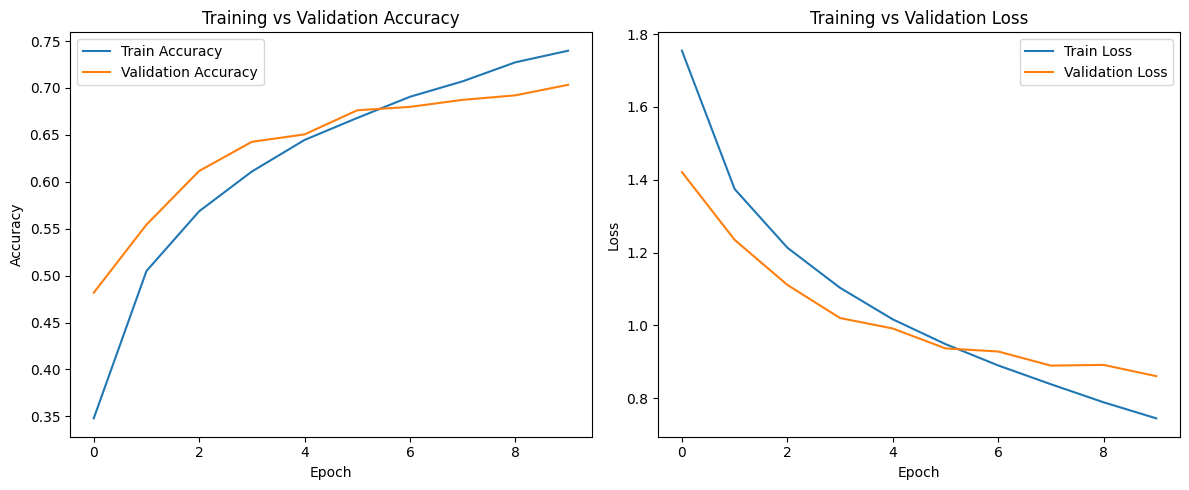

In [12]:
plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


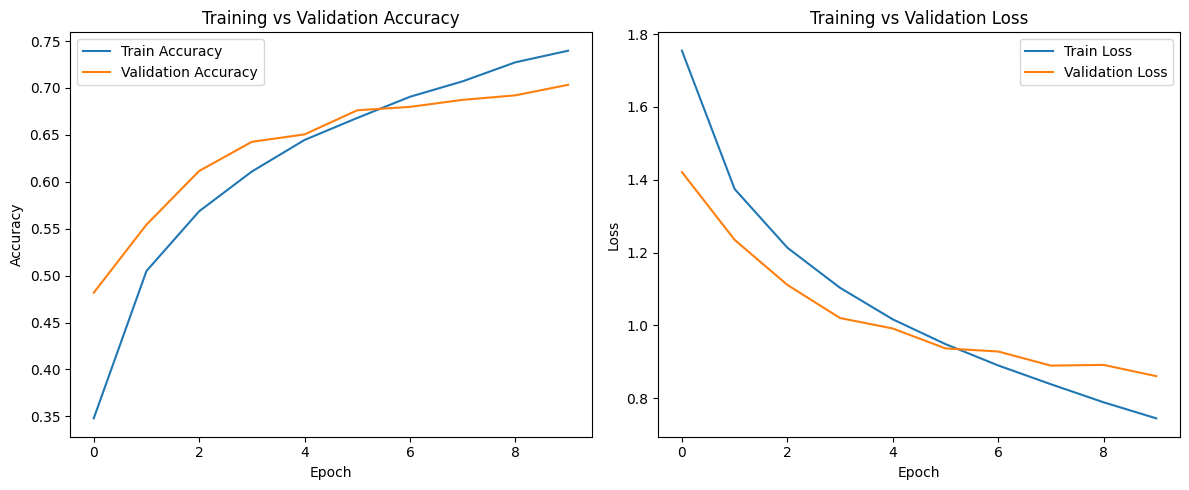

In [13]:
plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()

# Save Image
plt.savefig("../outputs/accuracy_loss_plot.png")

plt.show()


In [14]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


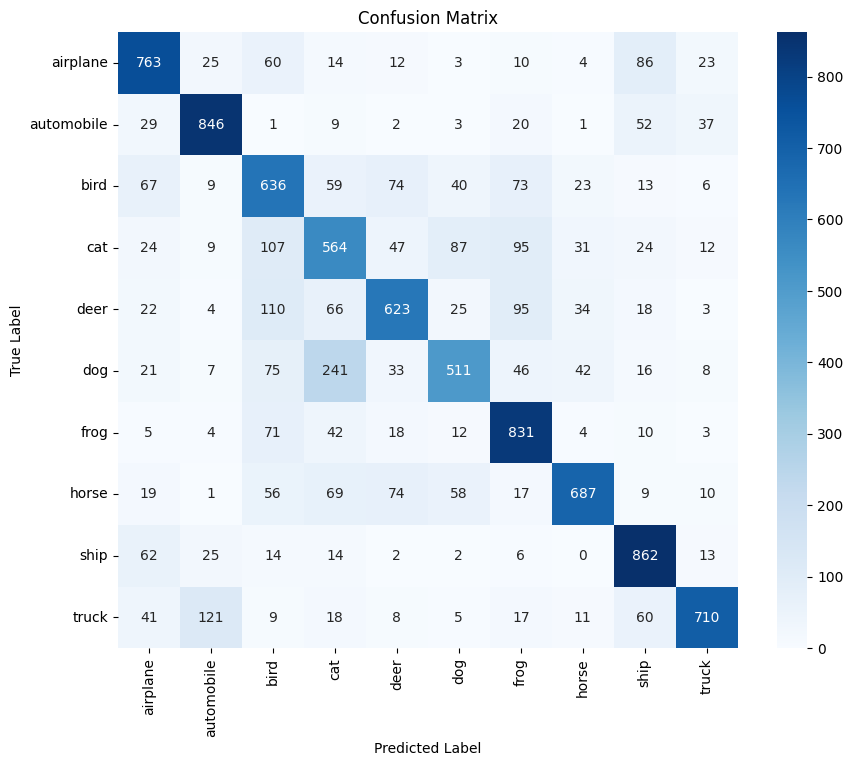

In [15]:
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


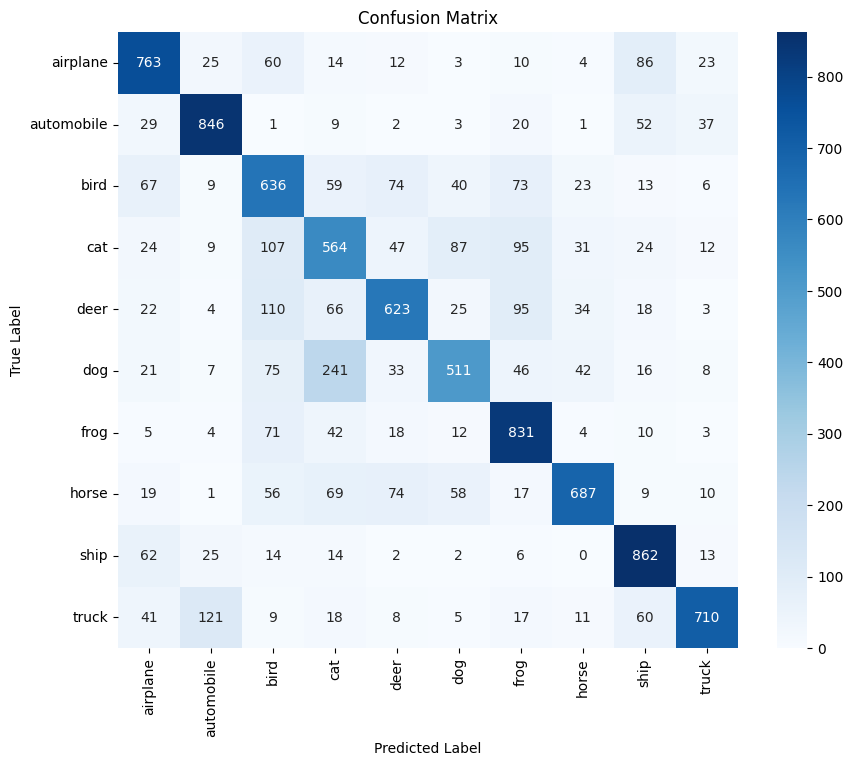

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.savefig("../outputs/confusion_matrix.png")
plt.show()


In [17]:
print(classification_report(y_test, y_pred_classes, target_names=class_names))


              precision    recall  f1-score   support

    airplane       0.72      0.76      0.74      1000
  automobile       0.80      0.85      0.82      1000
        bird       0.56      0.64      0.59      1000
         cat       0.51      0.56      0.54      1000
        deer       0.70      0.62      0.66      1000
         dog       0.68      0.51      0.59      1000
        frog       0.69      0.83      0.75      1000
       horse       0.82      0.69      0.75      1000
        ship       0.75      0.86      0.80      1000
       truck       0.86      0.71      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



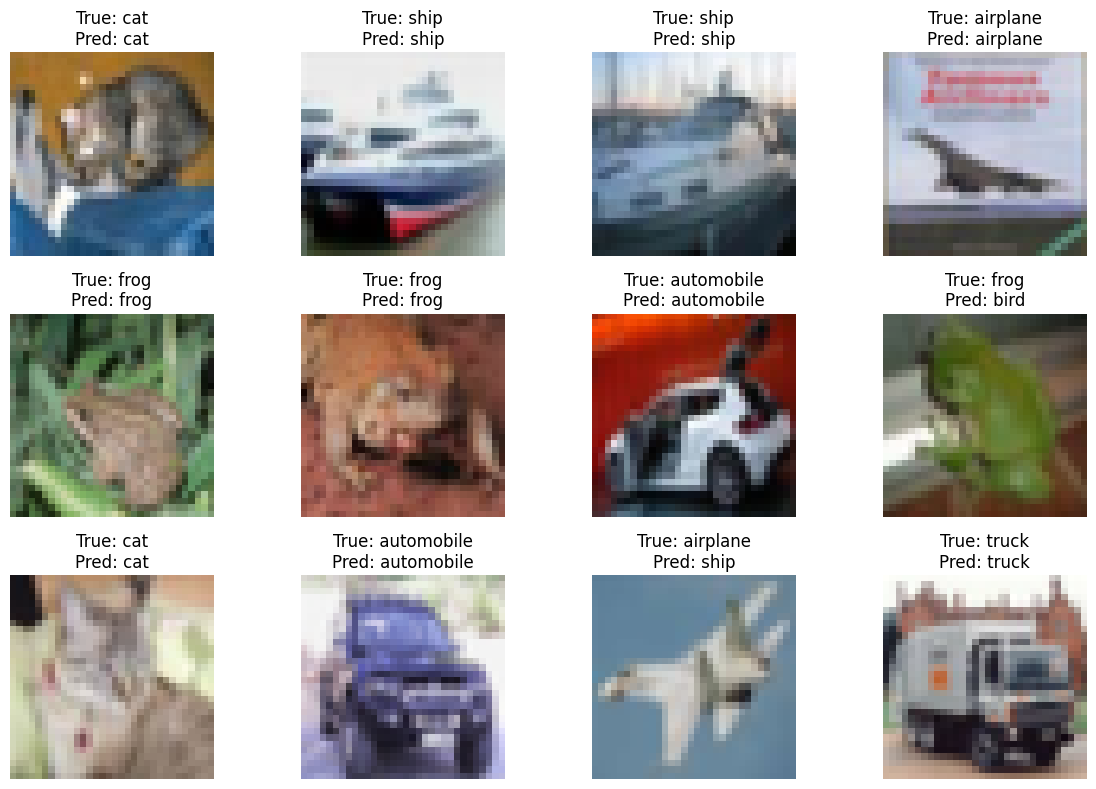

In [18]:
plt.figure(figsize=(12,8))

for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(x_test[i])
    
    true_label = class_names[y_test[i]]
    predicted_label = class_names[y_pred_classes[i]]
    
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()


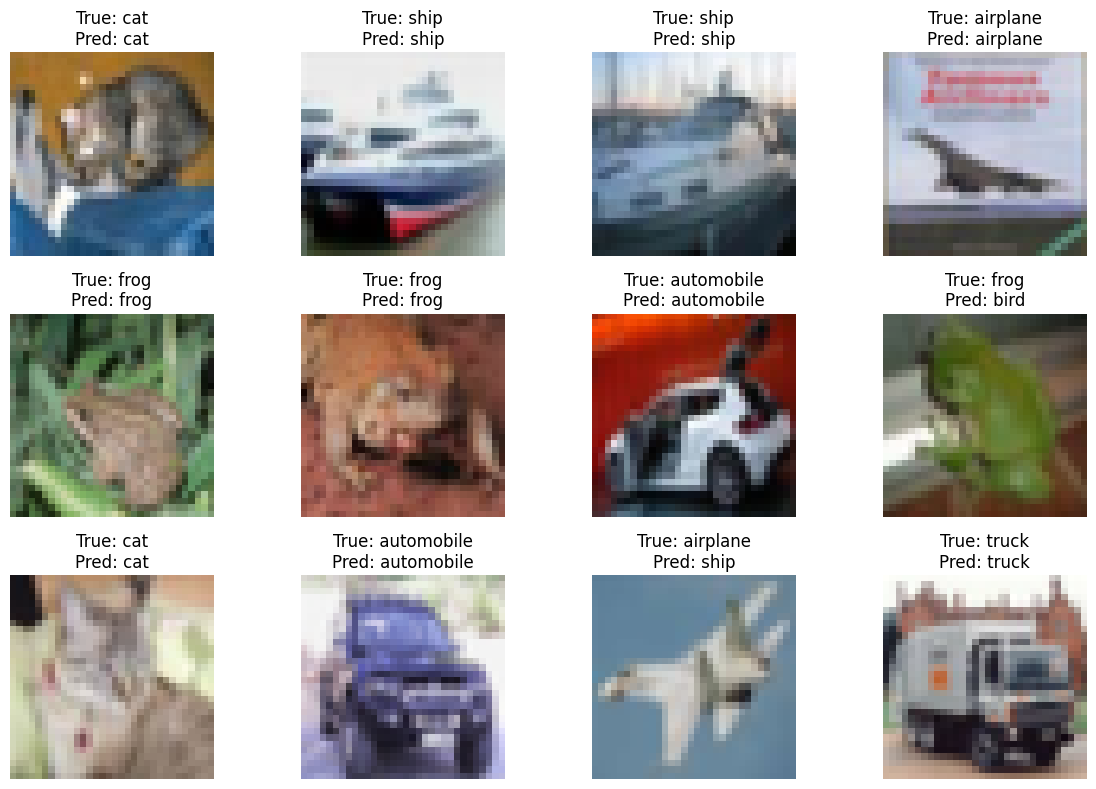

In [19]:
plt.figure(figsize=(12,8))

for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(x_test[i])
    
    true_label = class_names[y_test[i]]
    predicted_label = class_names[y_pred_classes[i]]
    
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis("off")

plt.tight_layout()

plt.savefig("../outputs/sample_predictions.png")
plt.show()


In [20]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7033 - loss: 0.8757
Test Loss: 0.8756834864616394
Test Accuracy: 0.7032999992370605


In [21]:
model.save("../models/cifar10_cnn_model.h5")
print("Model saved successfully in models folder!")


Model saved successfully in models folder!


In [22]:
print("Conclusion:")
print("The CNN model was successfully trained on CIFAR-10 dataset.")
print("It achieved good classification accuracy on the test dataset.")
print("Future improvements: Transfer Learning, Data Augmentation, Hyperparameter tuning.")


Conclusion:
The CNN model was successfully trained on CIFAR-10 dataset.
It achieved good classification accuracy on the test dataset.
Future improvements: Transfer Learning, Data Augmentation, Hyperparameter tuning.
